## Packages Installation

In [ ]:
!pip install --upgrade llvmlite
!pip install --upgrade git+https://github.com/scikit-learn-contrib/hdbscan.git#egg=hdbscan
# !pip install top2vec  # easy way to install Top2Vec
# !pip install top2vec[sentence_encoders]  # install if using pre-trained universal sentence encoder options
!pip install top2vec[sentence_transformers]  # install if using pre-trained BERT sentence transformer options

Requirement already up-to-date: llvmlite in /usr/local/lib/python3.6/dist-packages (0.35.0)
  Cloning https://github.com/scikit-learn-contrib/hdbscan.git to /tmp/pip-install-h62x9hm2/hdbscan
  Running command git clone -q https://github.com/scikit-learn-contrib/hdbscan.git /tmp/pip-install-h62x9hm2/hdbscan
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Created wheel for hdbscan: filename=hdbscan-0.8.26-cp36-cp36m-linux_x86_64.whl size=2311443 sha256=27616e173f825508ee5cdd840ec121e5fb181426c966eca6b1c41ffb99171898
  Stored in directory: /tmp/pip-ephem-wheel-cache-f9exq230/wheels/be/47/11/458e98e40285ec29eee36df10d017320cf84f1b45eed7ac4b4
Successfully built hdbscan
  Found existing installation: hdbscan 0.8.26
    Uninstalling hdbscan-0.8.26:
      Successfully uninstalled hdbscan-0.8.26
     |████████████████████████████████| 3.2MB 17.7MB/s 
  Found existing installation: numba 0.48.0
    Uninstalling numba

## Hotel Reviews Data Upload

In [ ]:
! pip install -q kaggle

In [ ]:
# Upload your Kaggle API token here to download hotel reviews data from Kaggle
# Else upload the hotel reviews CSV downloaded from https://www.kaggle.com/jiashenliu/515k-hotel-reviews-data-in-europe 
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"jiahao87","key":"daf34c8cabb3eb4394717fe16b77fd0d"}'}

In [ ]:
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/

In [ ]:
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
! kaggle datasets download -d jiashenliu/515k-hotel-reviews-data-in-europe

515k-hotel-reviews-data-in-europe.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
from zipfile import ZipFile

# Create a ZipFile Object and load sample.zip in it
with ZipFile('515k-hotel-reviews-data-in-europe.zip', 'r') as zipObj:
   # Extract all the contents of zip file in current directory
   zipObj.extractall()

In [ ]:
!ls

515k-hotel-reviews-data-in-europe.zip  kaggle.json
Hotel_Reviews.csv		       sample_data


## Topic Modeling

In [ ]:
from top2vec import Top2Vec
import pandas as pd
import numpy as np
import multiprocessing
import time

multiprocessing.cpu_count()

2

In [ ]:
hotel_reviews_df = pd.read_csv('Hotel_Reviews.csv', usecols=['Negative_Review', 'Review_Date'])
hotel_reviews_df.columns = [col.lower() for col in hotel_reviews_df.columns]
hotel_reviews_df['review_date'] = pd.to_datetime(hotel_reviews_df['review_date'])
hotel_reviews_df.info()
hotel_reviews_df.head(3)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 515738 entries, 0 to 515737
Data columns (total 2 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   review_date      515738 non-null  datetime64[ns]
 1   negative_review  515738 non-null  object        
dtypes: datetime64[ns](1), object(1)
memory usage: 7.9+ MB


,review_date,negative_review
0,2017-08-03,I am so angry that i made this post available...
1,2017-08-03,No Negative
2,2017-07-31,Rooms are nice but for elderly a bit difficul...


In [ ]:
# remove irrelevant reviews and scope to 2016 for example
filter_list = ['no negative', 'nothing', '', 'none', 'nil', 'n a', 'nothing all was good']
negative_reviews_df = hotel_reviews_df[~(hotel_reviews_df.negative_review.str.lower().str.strip().isin(filter_list))]
negative_reviews_df = negative_reviews_df[negative_reviews_df.review_date.dt.year==2016]
negative_reviews_df.head(3)

,review_date,negative_review
66,2016-12-29,Asked for more coffee and sugars only got giv...
67,2016-12-28,Room was not cleaned correctly Wine Champagne...
68,2016-12-21,The bathroom was amazing Though we were two f...


In [ ]:
# hotel_reviews = hotel_reviews_df.Review.values.tolist()
hotel_reviews = negative_reviews_df.negative_review.values.tolist()
type(hotel_reviews)

list

In [ ]:
len(hotel_reviews)

186842

In [ ]:
hotel_reviews[:5]

[' Asked for more coffee and sugars only got given two satchets of each Room cleaned floor not hovered as the rug was very messy Wifi worked for half a morning then never connected again for the whole trip ',
 ' Room was not cleaned correctly Wine Champagne glasses left dirty in the room the floors felt dirty and the shower drain was clogged From the day we arrived ',
 ' The bathroom was amazing Though we were two friends sharing and it had a glass screen so it was a bit uncomfortable at times They should think about a screen or opaque glass ',
 ' Our room didn t have a sofa in but these two uncomfortable chairs and the stairs was too steep for the room Didn t feel safe going up and down the stairs but these are minor issues I would recommend the hotel to anyone ',
 ' The breakfast was rather average from quality and appearance and not that well organized The young gentlemen managing this were more interested in watching the young female guests This was nice to see but at the same time

In [ ]:
start_time = time.time()
model_reviews = Top2Vec(documents=hotel_reviews, embedding_model='distiluse-base-multilingual-cased')  # run on GPU to speed things up
print('Total time taken (mins): ', int((time.time()-start_time)/60))

# model_reviews = Top2Vec(documents=hotel_reviews, embedding_model='universal-sentence-encoder')  # uncomment to use universal sentence encoder
# model_reviews = Top2Vec(documents=hotel_reviews, speed="deep-learn", workers=multiprocessing.cpu_count())  # uncomment to use Doc2Vec

2020-12-20 06:23:00,291 - top2vec - INFO - Pre-processing documents for training
INFO:top2vec:Pre-processing documents for training
2020-12-20 06:23:11,127 - top2vec - INFO - Downloading distiluse-base-multilingual-cased model
INFO:top2vec:Downloading distiluse-base-multilingual-cased model
2020-12-20 06:23:28,410 - top2vec - INFO - Creating joint document/word embedding
INFO:top2vec:Creating joint document/word embedding
2020-12-20 06:27:17,692 - top2vec - INFO - Creating lower dimension embedding of documents
INFO:top2vec:Creating lower dimension embedding of documents
2020-12-20 06:38:55,767 - top2vec - INFO - Finding dense areas of documents
INFO:top2vec:Finding dense areas of documents
2020-12-20 06:39:16,462 - top2vec - INFO - Finding topics
INFO:top2vec:Finding topics


Total time taken (mins):  16


In [ ]:
# show the total number of topics
model_reviews.get_num_topics() 

854

In [ ]:
topic_sizes, topic_nums = model_reviews.get_topic_sizes()
print(topic_sizes[:10])  # get sizes of top 10 topics
np.sum(topic_sizes)

[3680 2902 1777 1738 1587 1479 1463 1461 1422 1399]


186842

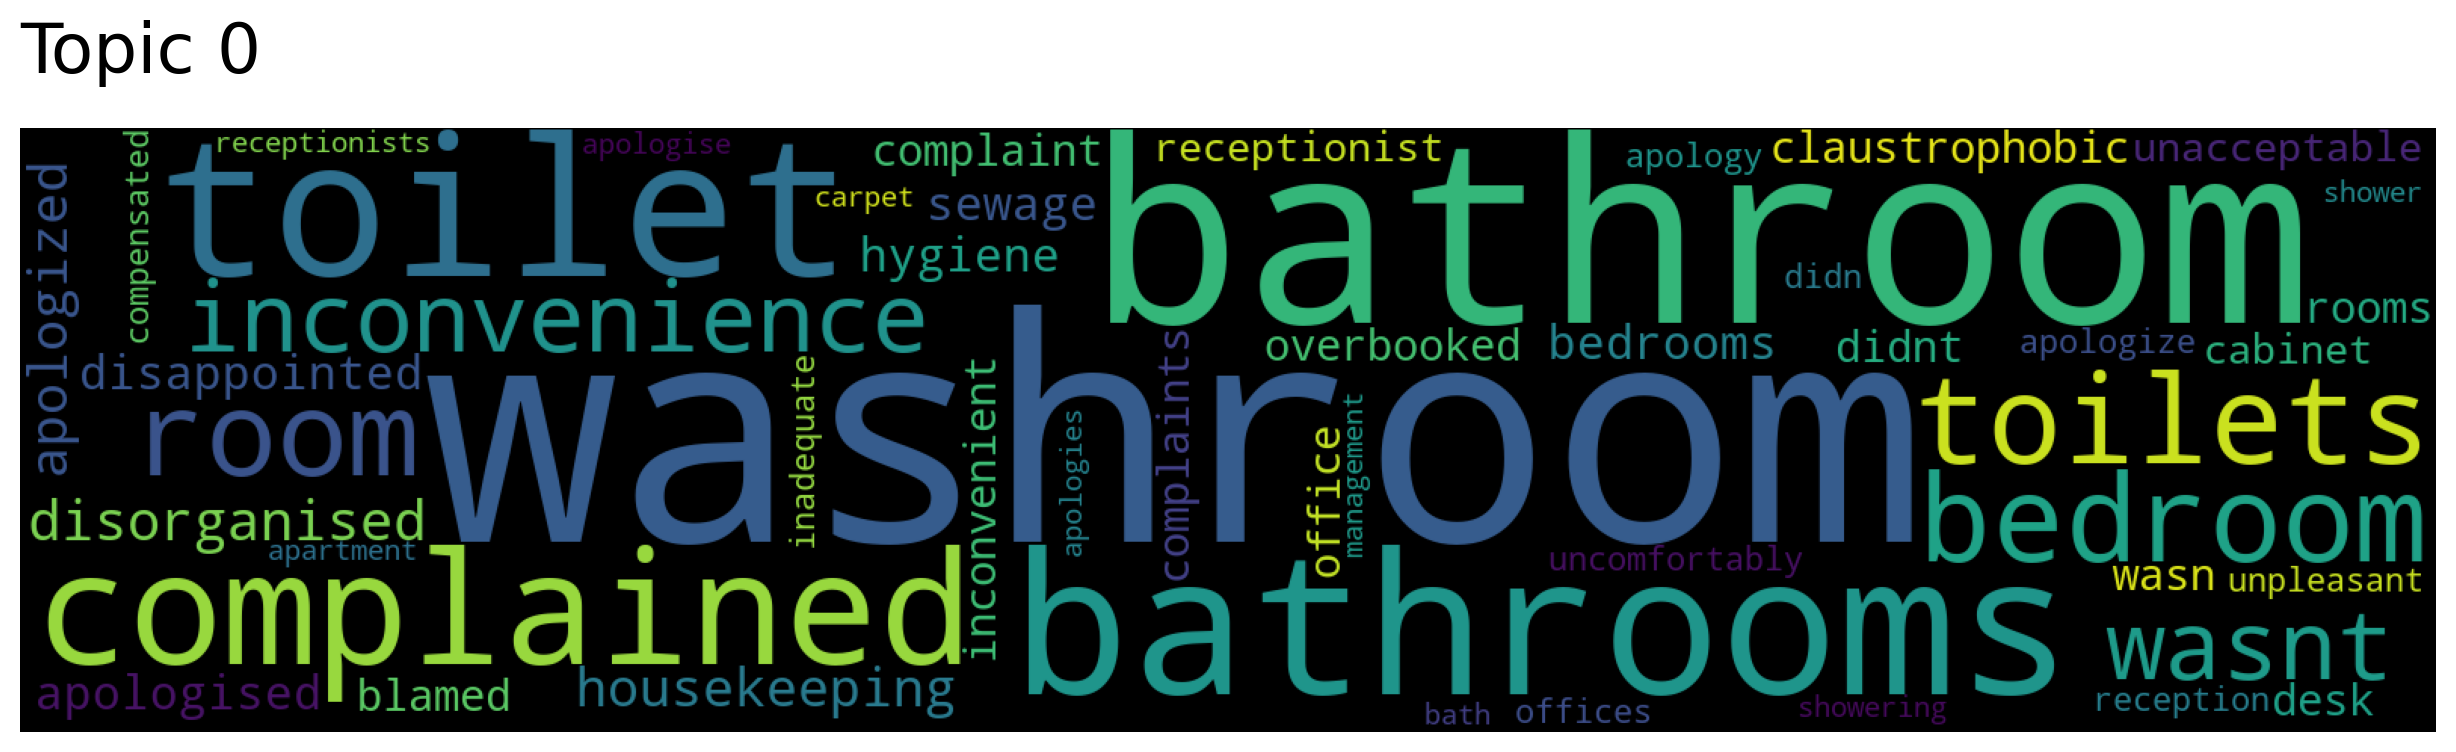

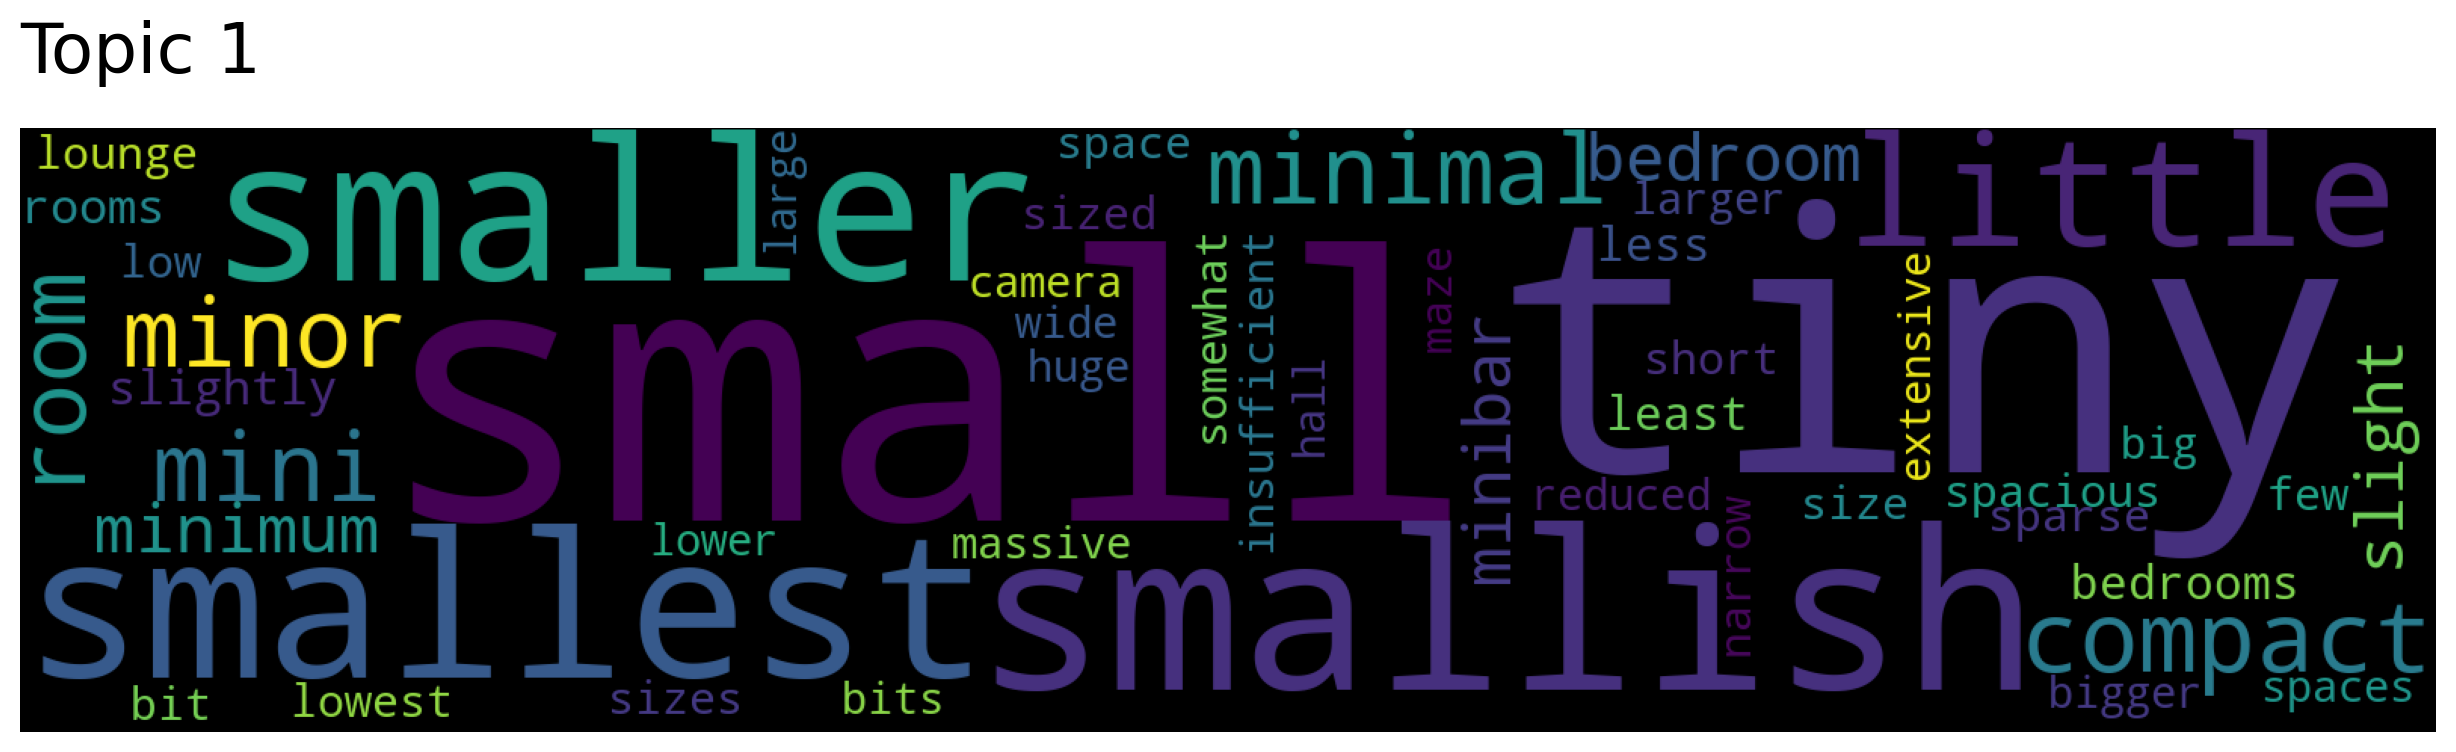

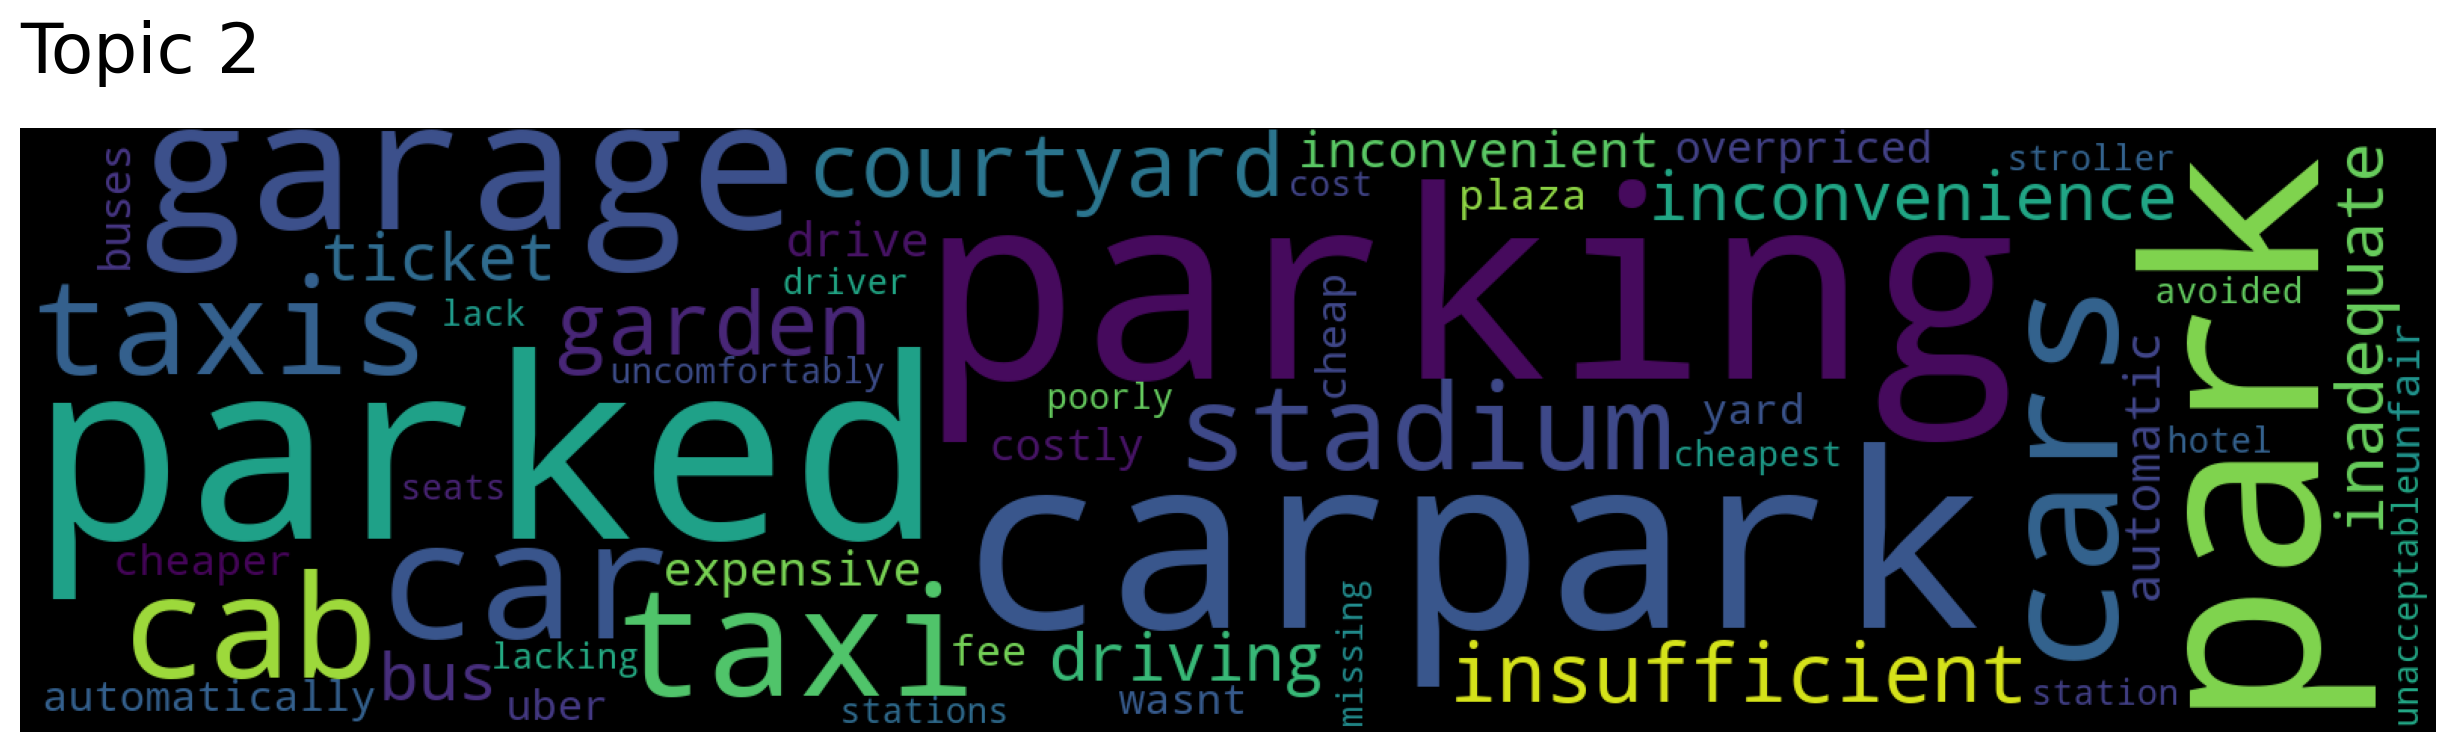

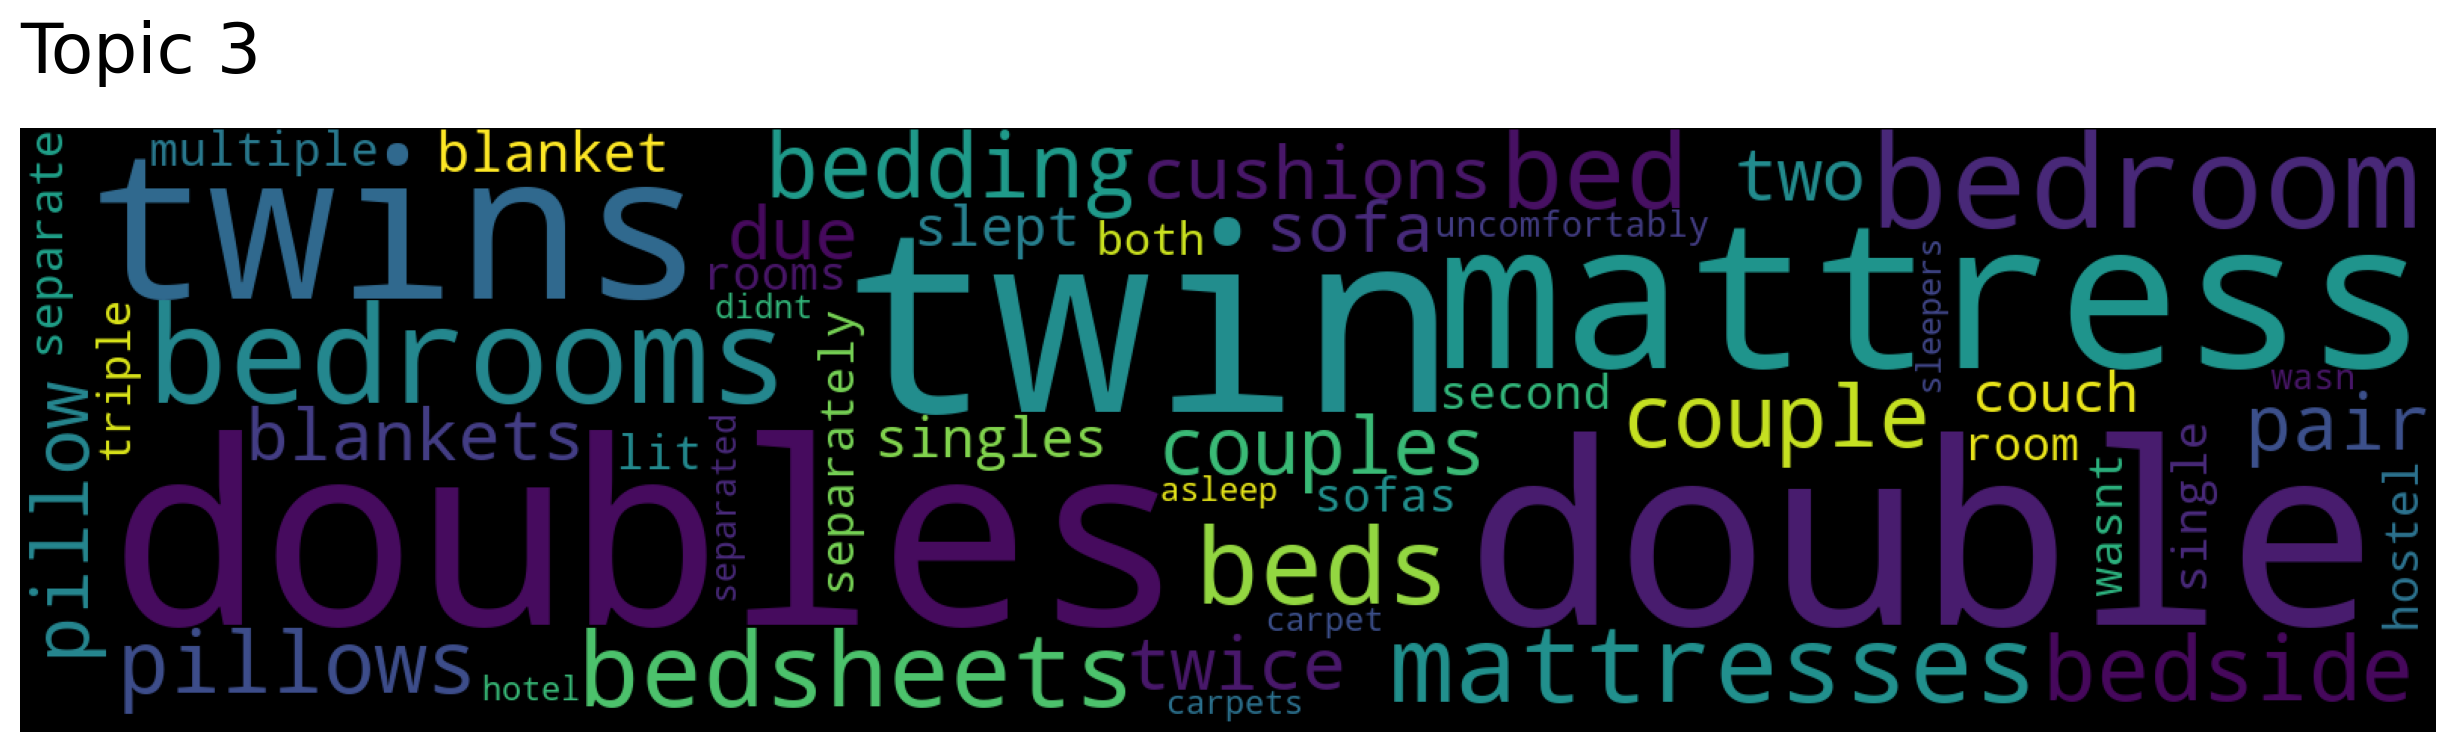

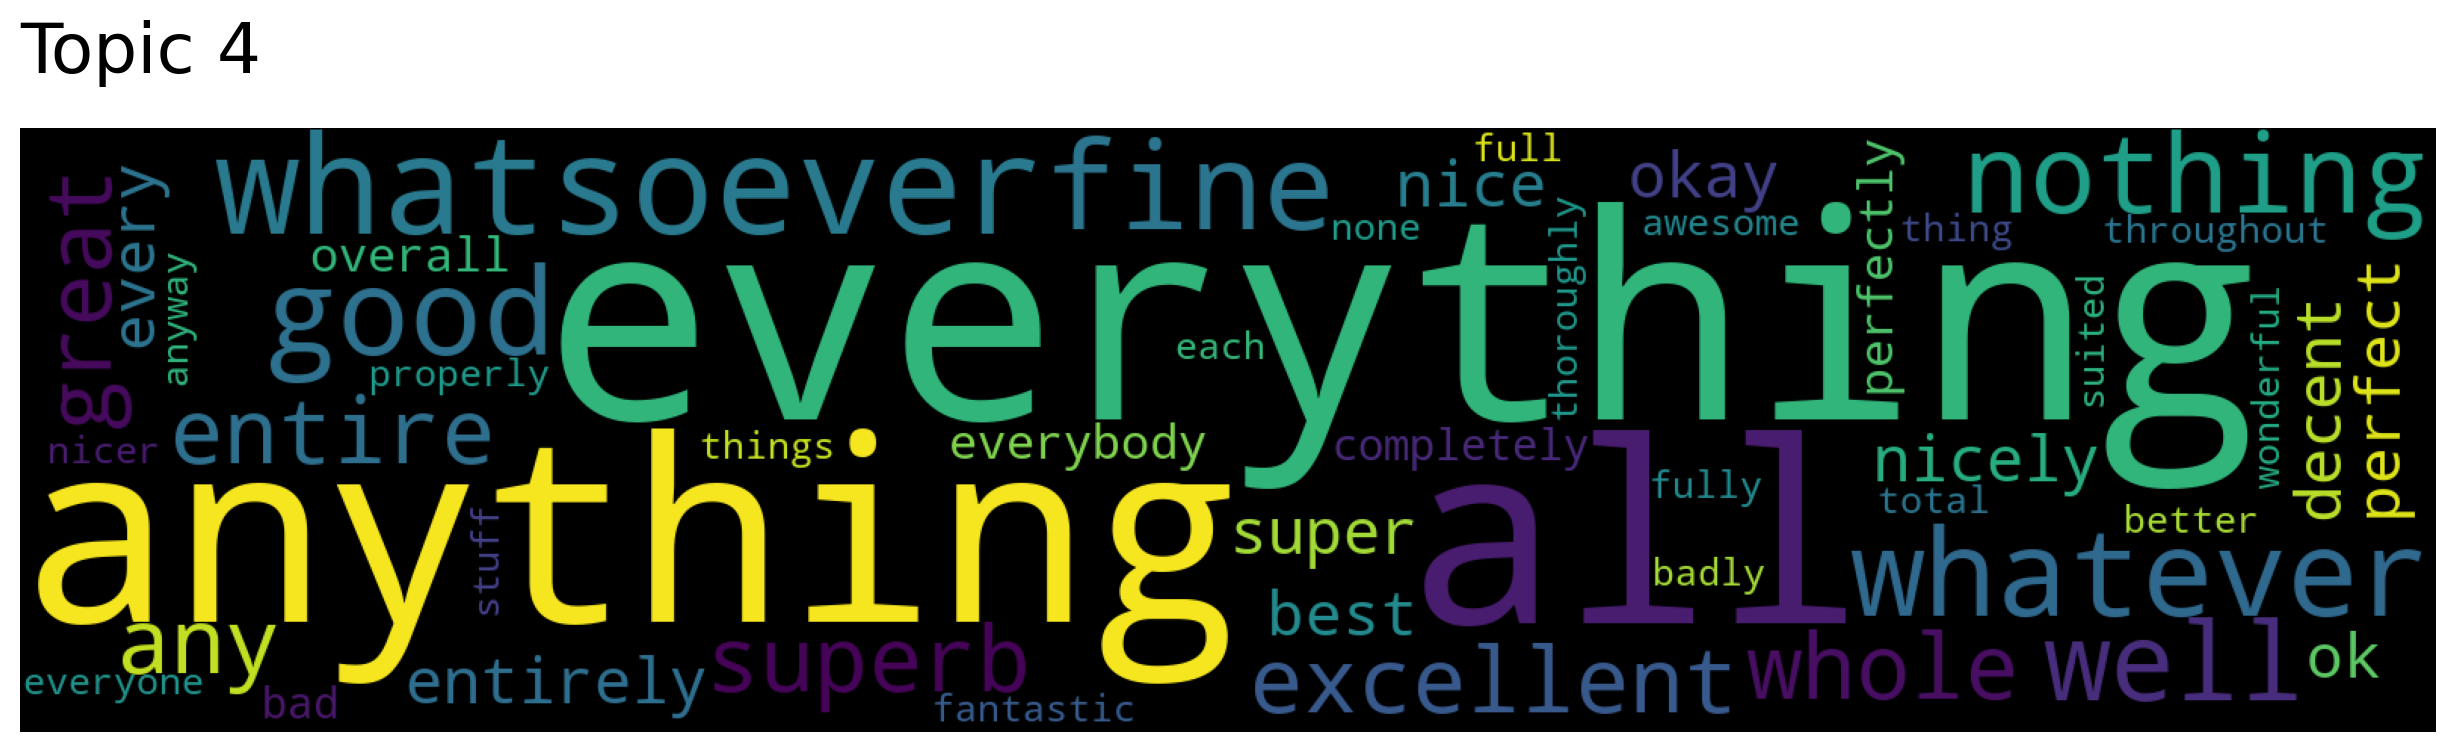

In [ ]:
topic_words, word_scores, topic_nums = model_reviews.get_topics(model_reviews.get_num_topics())
for topic in topic_nums[:5]:
    model_reviews.generate_topic_wordcloud(topic)

In [ ]:
documents, document_scores, document_ids = model_reviews.search_documents_by_topic(topic_num=0, num_docs=5)
for doc, score, doc_id in zip(documents, document_scores, document_ids):
    print(f"Document: {doc_id}, Score: {score}")
    print("-----------")
    print(doc)
    print("-----------")
    print()

Document: 167537, Score: 0.8425607085227966
-----------
 From the start our experience was bad There was only one person on check in so we had to queue Having been allcated our rooms we had to change them as we had specified adjacent or interconnecting rooms which they failed to do We then had to queue up again for the one person still on reception and 45 minutes later were allocated 2 adjacent rooms But one of the rooms had a smell of drains which I reported and which the very discourteous duty manager Thalia refused to deal with In fact she told me several times that I was wrong The rooms were small the beds very soft and the shower and toilet were part of the bedroom The smell of drains was coming from the shower For such an expensive hotel this was unacceptable especially the way the duty manager treated her customers I don t think I have ever encountered a more unpleasant manner in my many years of travelling 
-----------

Document: 54631, Score: 0.8341020941734314
-----------
 On

In [ ]:
documents, document_scores, document_ids = model_reviews.search_documents_by_topic(topic_num=1, num_docs=5)
for doc, score, doc_id in zip(documents, document_scores, document_ids):
    print(f"Document: {doc_id}, Score: {score}")
    print("-----------")
    print(doc)
    print("-----------")
    print()

Document: 79576, Score: 0.967035174369812
-----------
 Room fairly small
-----------

Document: 54839, Score: 0.9616751670837402
-----------
 Room pretty small 
-----------

Document: 46874, Score: 0.9599997997283936
-----------
 the room very small
-----------

Document: 96292, Score: 0.9599997997283936
-----------
 The room very small 
-----------

Document: 130976, Score: 0.9598941802978516
-----------
 Room are a bit small 
-----------



In [ ]:
documents, document_scores, document_ids = model_reviews.search_documents_by_topic(topic_num=2, num_docs=5)
for doc, score, doc_id in zip(documents, document_scores, document_ids):
    print(f"Document: {doc_id}, Score: {score}")
    print("-----------")
    print(doc)
    print("-----------")
    print()

Document: 89807, Score: 0.8185767531394958
-----------
 No parking had to park the car a few blocks away at public facility Expensive to do so 
-----------

Document: 11801, Score: 0.80922532081604
-----------
 No car park facilities after paying that much 
-----------

Document: 138325, Score: 0.8048310875892639
-----------
 lack of free parking space expensive parking fee
-----------

Document: 135162, Score: 0.8016210794448853
-----------
 Parking was expensive and couldn t find a spot to park the car in the area 
-----------

Document: 117326, Score: 0.799737811088562
-----------
 Lack of parking outside meant having to pay and display for parking which was expensive
-----------

